In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [52]:
# load pickled data
with open('CCLE_rank.pkl', 'rb') as f:
    ccle_rank = pickle.load(f)
with open('parkinsons_rank.pkl', 'rb') as f:
    parkinsons_rank = pickle.load(f)
with open('performance_rank.pkl', 'rb') as f:
    performance_rank = pickle.load(f)
with open('temperature_rank.pkl', 'rb') as f:
    temperature_rank = pickle.load(f)

In [53]:
# dictionaries = [ccle_rank, parkinsons_rank, performance_rank, temperature_rank]

# average_dict = {key: sum(d[key] for d in dictionaries) / len(dictionaries) for key in ccle_rank.keys()}

# sorted_keys = sorted(average_dict, key=average_dict.get)

# # Display sorted keys and their corresponding values
# sorted_average_dict = {key: average_dict[key] for key in sorted_keys}

# for k,v in sorted_average_dict.items():
#     print(k, v)

In [54]:
task = "regression" #"classification" #"regression"
ablation_directory ="/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_temperature_retrain/temperature_retrain/varying_sample_row_n"
#####Regression
#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_CCLE_PD_0325901_retrain/CCLE_PD_0325901_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_parkinsons_retrain/parkinsons_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_performance_retrain/performance_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_temperature_retrain/temperature_retrain/varying_sample_row_n"

#####Classification
#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_juvenile_retrain/juvenile_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_csi_pecarn_retrain/csi_pecarn_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_credit_g_retrain/credit_g_retrain/varying_sample_row_n"

#"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_Ionosphere_retrain/Ionosphere_retrain/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
rf_seeds = [1,2,3,4,5]
for split_seed in split_seeds:
    for rf_seed in rf_seeds:
        df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}rf_seed_{rf_seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)


# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [55]:
combined_df.head()

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,test_size,num_features,data_split_seed,rf_seed,num_features_masked,fi_time_absolute,num_features_selected_0.01,RF_Regressor_MSE_top_0.01,RF_Regressor_R2_top_0.01,Linear_Regressor_MSE_top_0.01,Linear_Regressor_R2_top_0.01,num_features_selected_0.05,RF_Regressor_MSE_top_0.05,RF_Regressor_R2_top_0.05,Linear_Regressor_MSE_top_0.05,Linear_Regressor_R2_top_0.05,num_features_selected_0.1,RF_Regressor_MSE_top_0.1,RF_Regressor_R2_top_0.1,Linear_Regressor_MSE_top_0.1,Linear_Regressor_R2_top_0.1,num_features_selected_0.15,RF_Regressor_MSE_top_0.15,RF_Regressor_R2_top_0.15,Linear_Regressor_MSE_top_0.15,Linear_Regressor_R2_top_0.15,num_features_selected_0.25,RF_Regressor_MSE_top_0.25,RF_Regressor_R2_top_0.25,Linear_Regressor_MSE_top_0.25,Linear_Regressor_R2_top_0.25,num_features_selected_0.4,RF_Regressor_MSE_top_0.4,RF_Regressor_R2_top_0.4,Linear_Regressor_MSE_top_0.4,Linear_Regressor_R2_top_0.4,num_features_selected_0.5,RF_Regressor_MSE_top_0.5,RF_Regressor_R2_top_0.5,Linear_Regressor_MSE_top_0.5,Linear_Regressor_R2_top_0.5,num_features_selected_0.7,RF_Regressor_MSE_top_0.7,RF_Regressor_R2_top_0.7,Linear_Regressor_MSE_top_0.7,Linear_Regressor_R2_top_0.7,num_features_selected_0.9,RF_Regressor_MSE_top_0.9,RF_Regressor_R2_top_0.9,Linear_Regressor_MSE_top_0.9,Linear_Regressor_R2_top_0.9,split_seed
0,NaN,keep_all_rows,0,100,5,0.33,42,RF,LIME_RF,683,337,46,1,1,46,104.601947,1,0.065978,0.585859,0.080756,0.493104,3,0.057773,0.637365,0.071752,0.549618,5,0.076612,0.519111,0.073049,0.541476,7,0.059147,0.628740,0.073312,0.539826,12,0.057959,0.636197,0.073617,0.537912,19,0.057859,0.636823,0.071591,0.550629,23,0.055291,0.652944,0.071319,0.552335,33,0.054722,0.656512,0.068056,0.572816,42,0.055254,0.653174,0.067633,0.575476,1
1,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_fit_on_all_RFPlus,683,337,46,1,1,46,6.051740,1,0.058014,0.635849,0.072183,0.546910,3,0.057286,0.640420,0.071752,0.549618,5,0.055986,0.648579,0.070452,0.557777,7,0.057412,0.639631,0.069463,0.563983,12,0.053869,0.661870,0.067566,0.575892,19,0.054150,0.660104,0.066602,0.581942,23,0.055168,0.653714,0.066852,0.580377,33,0.056201,0.647229,0.067106,0.578780,42,0.055829,0.649568,0.067379,0.577068,1
2,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_fit_on_all_average_RFPlus,683,337,46,1,1,46,6.443466,1,0.058014,0.635849,0.072183,0.546910,3,0.057286,0.640420,0.071752,0.549618,5,0.055486,0.651717,0.070881,0.555083,7,0.057270,0.640520,0.069463,0.563983,12,0.054145,0.660137,0.067566,0.575892,19,0.054853,0.655689,0.067253,0.577856,23,0.055981,0.648609,0.067493,0.576351,33,0.055092,0.654192,0.067219,0.578070,42,0.055283,0.652991,0.067379,0.577068,1
3,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_fit_on_all_error_metric_RFPlus,683,337,46,1,1,46,6.669140,1,0.065016,0.591902,0.081005,0.491539,3,0.058308,0.634004,0.071752,0.549618,5,0.056910,0.642778,0.071403,0.551811,7,0.057027,0.642049,0.070910,0.554904,12,0.055956,0.648766,0.067925,0.573638,19,0.056132,0.647663,0.067211,0.578121,23,0.055026,0.654609,0.067716,0.574955,33,0.054757,0.656293,0.066362,0.583450,42,0.055137,0.653908,0.067558,0.575946,1
4,NaN,keep_all_rows,0,100,5,0.33,42,RF,Local_MDI+_fit_on_all_error_metric_average_RFPlus,683,337,46,1,1,46,7.259469,1,0.065016,0.591902,0.081005,0.491539,3,0.058308,0.634004,0.071752,0.549618,5,0.056910,0.642778,0.071403,0.551811,7,0.057027,0.642049,0.070910,0.554904,12,0.055956,0.648766,0.067925,0.573638,19,0.056132,0.647663,0.067211,0.578121,23,0.055026,0.654609,0.067716,0.574955,33,0.054757,0.656293,0.066362,0.583450,42,0.055137,0.653908,0.067558,0.575946,1


In [56]:
#combined_df = combined_df[(combined_df['heritability'] == 0.8) & (combined_df['n_train'] == 750)]

In [57]:
# df = pd.DataFrame(combined_df_rf_plus)
# averages = df.groupby('Model').mean().reset_index()
# pd.DataFrame(averages)

In [58]:
combined_df["num_features"].unique()

array([46])

### Summarise the Ablation Data

In [59]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 683 and the test size is 337


In [60]:
combined_df["fi"].unique()

array(['LIME_RF', 'Local_MDI+_fit_on_all_RFPlus',
       'Local_MDI+_fit_on_all_average_RFPlus',
       'Local_MDI+_fit_on_all_error_metric_RFPlus',
       'Local_MDI+_fit_on_all_error_metric_average_RFPlus',
       'Local_MDI+_fit_on_all_error_metric_ranking_RFPlus',
       'Local_MDI+_fit_on_all_l2_norm_RFPlus',
       'Local_MDI+_fit_on_all_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_all_ranking_RFPlus',
       'Local_MDI+_fit_on_all_ranking_ridge_RFPlus',
       'Local_MDI+_fit_on_inbag_RFPlus',
       'Local_MDI+_fit_on_inbag_average_RFPlus',
       'Local_MDI+_fit_on_inbag_error_metric_RFPlus',
       'Local_MDI+_fit_on_inbag_error_metric_average_RFPlus',
       'Local_MDI+_fit_on_inbag_error_metric_ranking_RFPlus',
       'Local_MDI+_fit_on_inbag_l2_norm_RFPlus',
       'Local_MDI+_fit_on_inbag_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_inbag_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_inbag_ranking_RFP

### Plot the Ablation Data Performance

In [61]:
methods = ['LIME_RF', 
#         'Local_MDI+_fit_on_all_RFPlus',
#        'Local_MDI+_fit_on_all_average_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_all_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_all_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_all_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_all_ranking_RFPlus',
#        'Local_MDI+_fit_on_all_ranking_ridge_RFPlus',
#        'Local_MDI+_fit_on_inbag_RFPlus',
#        'Local_MDI+_fit_on_inbag_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_average_RFPlus',
#        'Local_MDI+_fit_on_inbag_l2_norm_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_ranking_RFPlus',
#        'Local_MDI+_fit_on_inbag_ranking_ridge_RFPlus',
#        'Local_MDI+_fit_on_oob_RFPlus',
#        'Local_MDI+_fit_on_oob_average_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_average_RFPlus',
#        'Local_MDI+_fit_on_oob_error_metric_ranking_RFPlus',
#        'Local_MDI+_fit_on_oob_l2_norm_RFPlus',
#        'Local_MDI+_fit_on_oob_l2_norm_average_RFPlus',
       'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus',
       'Local_MDI+_fit_on_oob_ranking_RFPlus',
#        'Local_MDI+_fit_on_oob_ranking_ridge_RFPlus',
        # 'Random',
       'TreeSHAP_RF']

num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R2"], "classification": ["AUROC", "LogLoss"]} #MSE
ablation_models = {"regression": ["RF_Regressor"],#, "Linear_Regressor"],
                   "classification": ["RF_Classifier", "Logistic_Regression"]}

In [62]:
color_map = {
    'LIME_RF': '#1f77b4',  # Bold blue
    'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
    'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
    'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
    'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
    'TreeSHAP_RF': '#9467bd',  # Bold purple
}

# color_map = {
#     'LIME_RF': '#1f77b4',  # bold blue
#     'Local_MDI+_fit_on_all_RFPlus': '#ff7f0e',  # vibrant orange
#     'Local_MDI+_fit_on_all_average_RFPlus': '#2ca02c',  # bright green
#     'Local_MDI+_fit_on_all_error_metric_RFPlus': '#d62728',  # bright red
#     'Local_MDI+_fit_on_all_error_metric_average_RFPlus': '#9467bd',  # bold purple
#     'Local_MDI+_fit_on_all_error_metric_ranking_RFPlus': '#8c564b',  # strong brown
#     'Local_MDI+_fit_on_all_l2_norm_RFPlus': '#e377c2',  # pink
#     'Local_MDI+_fit_on_all_l2_norm_average_RFPlus': '#bcbd22',  # lime green
#     'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#17becf',  # cyan
#     'Local_MDI+_fit_on_all_ranking_RFPlus': '#7f7f7f',  # medium gray
#     'Local_MDI+_fit_on_all_ranking_ridge_RFPlus': '#bc5a34',  # burnt orange
#     'Local_MDI+_fit_on_inbag_RFPlus': '#000000',  # black
#     'Local_MDI+_fit_on_inbag_average_RFPlus': '#7fbc41',  # moss green
#     'Local_MDI+_fit_on_inbag_error_metric_RFPlus': '#ff9896',  # light coral
#     'Local_MDI+_fit_on_inbag_error_metric_average_RFPlus': '#aec7e8',  # light blue
#     'Local_MDI+_fit_on_inbag_error_metric_ranking_RFPlus': '#9edae5',  # light cyan
#     'Local_MDI+_fit_on_inbag_l2_norm_RFPlus': '#b29189',  # warm taupe
#     'Local_MDI+_fit_on_inbag_l2_norm_average_RFPlus': '#c49c94',  # peach
#     'Local_MDI+_fit_on_inbag_l2_norm_ranking_RFPlus': '#dbdb8d',  # soft yellow-green
#     'Local_MDI+_fit_on_inbag_ranking_RFPlus': '#393b79',  # dark blue
#     'Local_MDI+_fit_on_inbag_ranking_ridge_RFPlus': '#637939',  # dark olive green
#     'Local_MDI+_fit_on_oob_RFPlus': '#8c6d31',  # earthy brown
#     'Local_MDI+_fit_on_oob_average_RFPlus': '#843c39',  # dark brick red
#     'Local_MDI+_fit_on_oob_error_metric_RFPlus': '#7b4173',  # deep purple
#     'Local_MDI+_fit_on_oob_error_metric_average_RFPlus': '#6b6ecf',  # muted indigo
#     'Local_MDI+_fit_on_oob_error_metric_ranking_RFPlus': '#5254a3',  # steel blue
#     'Local_MDI+_fit_on_oob_l2_norm_RFPlus': '#8ca252',  # olive
#     'Local_MDI+_fit_on_oob_l2_norm_average_RFPlus': '#bd9e39',  # mustard yellow
#     'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#d6616b',  # muted pink
#     'Local_MDI+_fit_on_oob_ranking_RFPlus': '#ce6dbd',  # bright magenta
#     'Local_MDI+_fit_on_oob_ranking_ridge_RFPlus': '#de9ed6',  # soft magenta
#     'Random': '#ad494a',  # warm red
#     'TreeSHAP_RF': '#6baed6',  # sky blue
# }

In [63]:
if num_features > 20:
    all_ratios = [0.01, 0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
else:
    all_ratios = [0.05, 0.1, 0.15, 0.25, 0.4, 0.5, 0.7, 0.9]
num_features_selected = []
for r in all_ratios:
    num_features_selected.append(combined_df[f"num_features_selected_{r}"].unique()[0])

#### Summary of results

In [64]:
# results = {}
# for a_model in ["RF_Regressor"]:
#     for metric in ["MSE"]:
#         for m in methods:
#             results[m] = []
#         for m in methods:
#             for k in all_ratios:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

# filtered_sums = {
#     key: sum(values[:5]) 
#     for key, values in results.items()
# }
# sorted(filtered_sums, key=filtered_sums.get)

# import pickle

# list_dict = {element: index + 1 for index, element in enumerate(sorted(filtered_sums, key=filtered_sums.get))}

# with open("temperature_rank.pkl", "wb") as file:
#     pickle.dump(list_dict, file)

# print("Dictionary saved as pickle file:", list_dict)

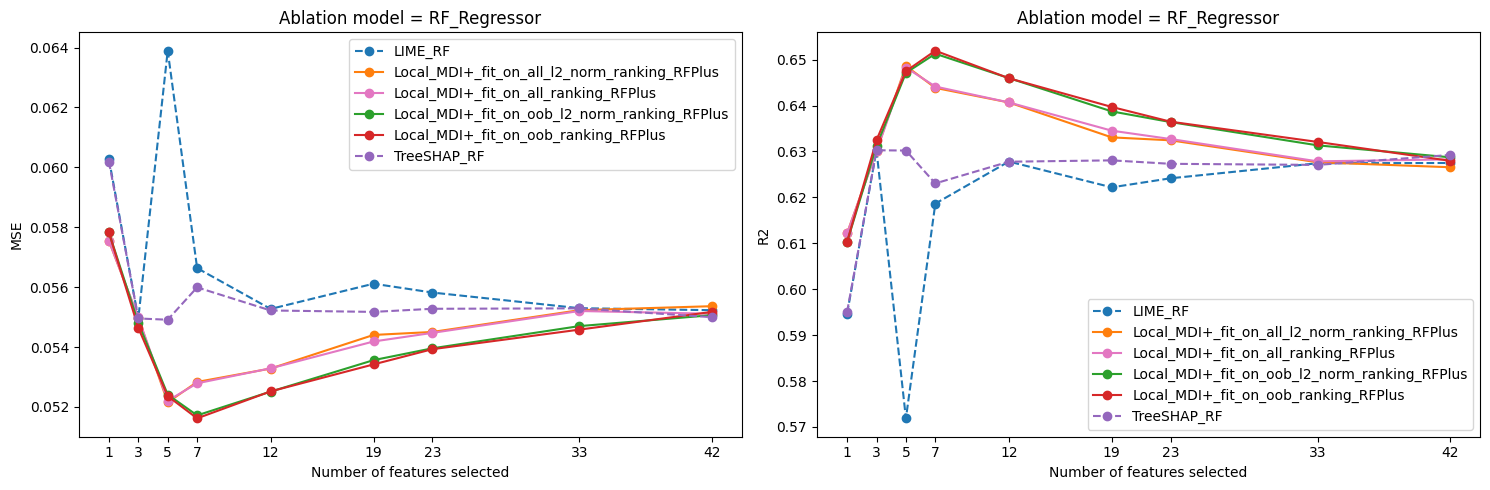

In [65]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))

for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in all_ratios:
                results[m].append(combined_df[combined_df['fi'] == m][a_model + f"_{metric}_top_{k}"].mean())

        # excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}
        # filtered_sums = {
        #     key: sum(values[:5]) 
        #     for key, values in results.items() if key not in excluded_keys
        # }
        # if metric == "MSE" or metric == "LogLoss":
        #     top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]
        # else:
        #     top_3_keys =sorted(filtered_sums, key=filtered_sums.get, reverse=True)[:3]
        # top_3_keys.extend(['LIME_RF', 'TreeSHAP_RF'])

        ax = axs[j]#, j]
        for m in methods:#top_3_keys:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "LIME_RF", "Random"]:
                ax.plot(num_features_selected, results[m], label=m, linestyle='dashed', color=color, marker='o')
            else:
                ax.plot(num_features_selected, results[m], label=m, color=color, marker='o')
        ax.set_xticks(num_features_selected)
        ax.set(
            xlabel='Number of features selected',
            ylabel=f"{metric}",
            title=f'Ablation model = {a_model}'
        )
        ax.legend()

plt.tight_layout()
#plt.savefig(f"./Ionosphere.png")
plt.show()


In [66]:
results

{'LIME_RF': [0.5946887264464954,
  0.6302589415485504,
  0.5718717500808281,
  0.6186357071039745,
  0.6278066492913282,
  0.622186952873706,
  0.6241569295279662,
  0.6274335884484686,
  0.627492009166962],
 'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': [0.6121779642427637,
  0.6301353845294378,
  0.6486432934362347,
  0.6438457191404946,
  0.6406776436965793,
  0.6330689546234465,
  0.6324295722924849,
  0.6276463015207704,
  0.6265642527241945],
 'Local_MDI+_fit_on_all_ranking_RFPlus': [0.6121779642427637,
  0.6300061937591899,
  0.6482813626398071,
  0.6441404694297874,
  0.6406839693372415,
  0.634527928971809,
  0.6327065258181216,
  0.6278504115268281,
  0.6282659921707162],
 'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': [0.6103185406161723,
  0.6312721204988823,
  0.6471158702702111,
  0.6512827262116713,
  0.6459821694674747,
  0.6387281907206704,
  0.6364020112407093,
  0.6313339086114025,
  0.6287347727058703],
 'Local_MDI+_fit_on_oob_ranking_RFPlus': [0.6103185406161723

In [67]:
# Filtered keys to exclude
excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}

# Compute the sum of the first five numbers for each key (excluding the specified keys)
filtered_sums = {
    key: sum(values[:5]) 
    for key, values in results.items() if key not in excluded_keys
}

# Sort the keys by their sum and extract the top 3 keys with the lowest sums
top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]

In [68]:
top_3_keys

['Local_MDI+_fit_on_all_ranking_RFPlus',
 'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus',
 'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus']

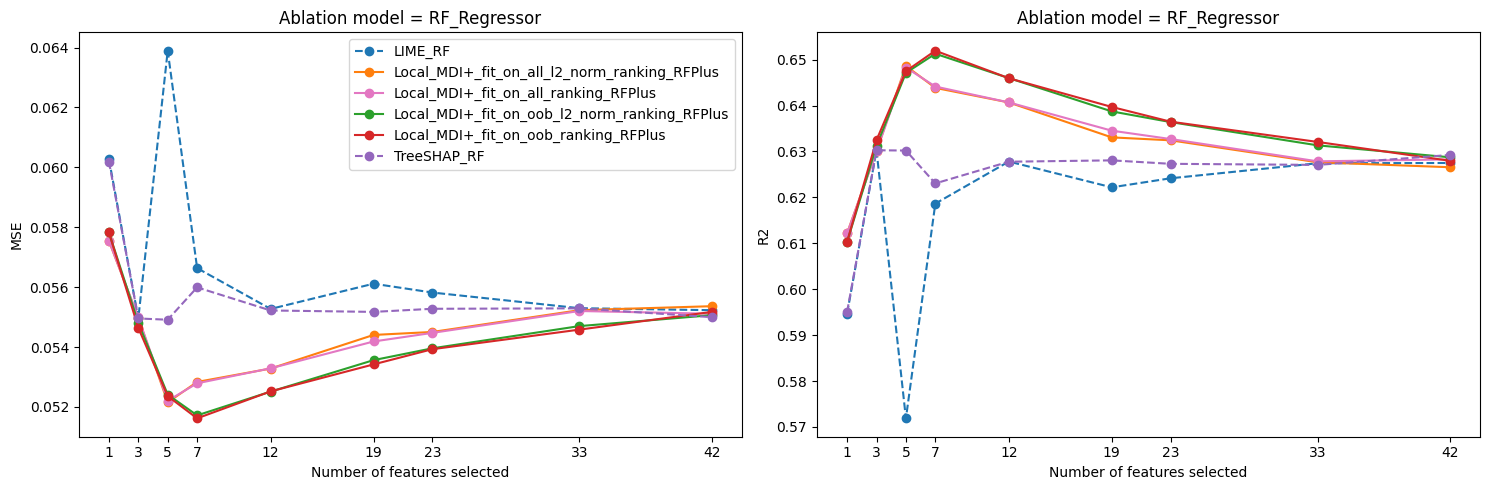

In [69]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in all_ratios:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_top_{k}"].mean())
        ax = axs[j] 
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF",  "LIME_RF", "Random"]:
                ax.plot(num_features_selected, results[m], label=m, linestyle='dashed', color=color, marker='o')
            else:
                ax.plot(num_features_selected, results[m], label=m, color=color, marker='o')
        ax.set_xticks(num_features_selected)
        ax.set(xlabel='Number of features selected', ylabel= f"{metric}",
            title=f'Ablation model = {a_model}')
        if i == 0 and j==0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}.png")
plt.show()

In [70]:
assert False
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        # Initialize a new figure for each plot
        fig, ax = plt.subplots(figsize=(18, 8))
        
        results = {}
        for m in methods:
            results[m] = []
        
        for m in methods:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_after_ablation_{k}_absolute"].mean())
        
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "LIME_RF", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color, marker='o', markersize=4)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color, marker='o', markersize=4)
        
        ax.set_xticks(range(num_features+1))
        ax.set(xlabel='Number of features masked', ylabel=f"{metric}",
               title=f'Ablation model = {a_model}')
        
        # Add legend only once for each figure
        if j == 0:
            ax.legend()
        
        plt.tight_layout()
        # Optionally save each plot as a separate file
        # plt.savefig(f"./{task_name}_{task}_model_{a_model}_metric_{metric}.png")
        plt.show()


AssertionError: 

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 5))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods:
            results[m] = []
        for m in methods:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[j] 
        for m in methods:
            color = color_map[m]
            if m in ["TreeSHAP_RF",  "LIME_RF", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color, marker='o', markersize=4)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color, marker='o', markersize=4)
        ax.set_xticks(range(num_features+1))
        ax.set(xlabel='Number of features selected', ylabel= f"{metric}",
            title=f'Ablation model = {a_model}')
        if i == 0 and j==0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}.png")
plt.show()

#### Training Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            for k in range(num_features+1):
                results[m].append(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_{metric}_after_ablation_{k}_absolute"].mean())
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        ax.set(xlabel='Number of features ablated', ylabel= f"metric",
            title=f'Ablation model = {a_model}')
        if i == 0:
            ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

### Test subset

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_absolute"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_subset_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

### Test set

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_absolute"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_positive"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                for k in range(num_features+1):
                    results[m].append(np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_test_delta_MSE_after_ablation_{k}_negative"].mean()))
        ax = axs[i]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#             #     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean()))
#                 for k in range(num_features+1):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+f"_train_subset_delta_MSE_after_ablation_{k}_absolute"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# #plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
# plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_train_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_train_addition.png")
# plt.show()

#### Test Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_subset_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test_subset:
#             results[m] = []
#         for m in methods_test_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
# plt.show()

#### Test Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
#plt.savefig(f"./{task_name}_{task}_test_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test:
#             results[m] = []
#         for m in methods_test:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = {test_size}')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = {test_size}')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # #plt.savefig(f"./{task_name}_{task}_test_addition.png")
# plt.show()